# Spatial Joining

>Take 10 random points on Earth.
>
>Which are on land, which on sea
>
>If on land, which country are they in?

In [ ]:
import numpy as np 
import geopandas as gpd 
%matplotlib inline
import matplotlib.pyplot as plt 
np.random.seed(11)

from helpers import world

In [16]:
bb = world.total_bounds
x = np.random.uniform(bb[0], bb[2], 10)
y = np.random.uniform(bb[1], bb[3], 10)
random_points = gpd.points_from_xy(x, y, crs=4326)
random_points = gpd.GeoDataFrame({'geometry': random_points})
print(random_points[::2])

                      geometry
0  POINT (-35.39647 -78.84753)
2    POINT (78.4257 -77.74788)
4   POINT (18.85817 -77.68544)
6    POINT (175.20239 47.2182)
8   POINT (-93.64512 47.65558)


In [17]:
world_random = world[world.intersects(random_points.union_all())]
print(world_random)

    iso_a2      name_long      continent   region_un  \
4       US  United States  North America    Americas   
137     AU      Australia        Oceania     Oceania   
159     AQ     Antarctica     Antarctica  Antarctica   

                     subregion           type      area_km2          pop  \
4             Northern America        Country  9.510744e+06  318622525.0   
137  Australia and New Zealand        Country  7.687614e+06   23504138.0   
159                 Antarctica  Indeterminate  1.233596e+07          NaN   

       lifeExp     gdpPercap  \
4    78.841463  51921.984639   
137  82.300000  43547.197484   
159        NaN           NaN   

                                              geometry  
4    MULTIPOLYGON (((-171.73166 63.78252, -171.7911...  
137  MULTIPOLYGON (((126.14871 -32.21597, 127.10287...  
159  MULTIPOLYGON (((-180 -89.9, 179.99999 -89.9, 1...  


In [18]:
random_joined = random_points.sjoin(world, how='left')
print(random_joined)

                      geometry  index_right iso_a2      name_long  \
0  POINT (-35.39647 -78.84753)        159.0     AQ     Antarctica   
1  POINT (125.27243 -26.62273)        137.0     AU      Australia   
2    POINT (78.4257 -77.74788)        159.0     AQ     Antarctica   
3   POINT (36.74305 -34.47529)          NaN    NaN            NaN   
4   POINT (18.85817 -77.68544)        159.0     AQ     Antarctica   
5  POINT (161.67685 -39.52615)          NaN    NaN            NaN   
6    POINT (175.20239 47.2182)          NaN    NaN            NaN   
7   POINT (-58.30055 67.22782)          NaN    NaN            NaN   
8   POINT (-93.64512 47.65558)          4.0     US  United States   
9     POINT (106.71686 7.6009)          NaN    NaN            NaN   

       continent   region_un                  subregion           type  \
0     Antarctica  Antarctica                 Antarctica  Indeterminate   
1        Oceania     Oceania  Australia and New Zealand        Country   
2     Antarctica  

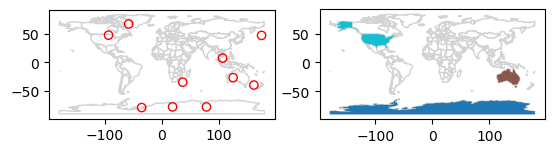

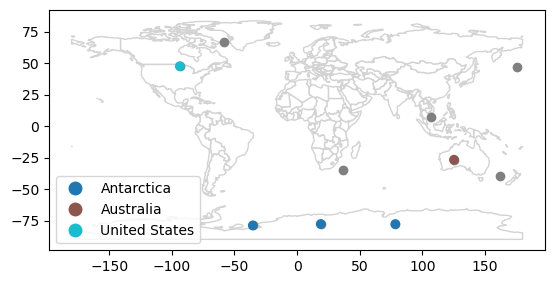

In [31]:
fig, (ax1, ax2) = plt.subplots(1,2)
world.plot(ax=ax1, color='w', edgecolor='lightgrey')
random_points.plot(ax=ax1, color='None', edgecolor='r')
world.plot(ax=ax2, color='w', edgecolor='lightgrey')
world_random.plot(ax=ax2, column='name_long')
ax3 = world.plot(color='w', edgecolor='lightgrey')
random_joined.geometry.plot(ax=ax3, color='grey')
random_joined.plot(ax=ax3, column = 'name_long', legend=True);
